In [24]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [28]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [30]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)



In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [33]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Find the most recent date in the data set.
Most_Recent_Date = session.query(func.max(measurement.date)).first()
print ( "the most recent date in the data set :", Most_Recent_Date)

the most recent date in the data set : ('2017-08-23',)


the date one year from the last date in data set : 2016-08-23


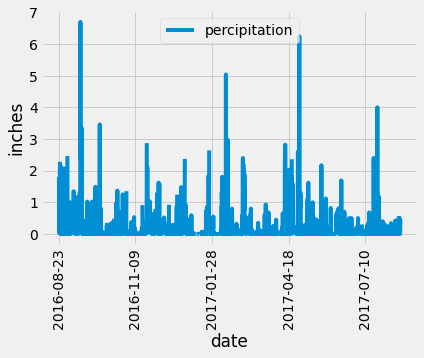

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
one_year_from_lastDate = dt.date(2017,8,23) - dt.timedelta(days=365)
print ("the date one year from the last date in data set :", one_year_from_lastDate)

# Perform a query to retrieve the data and precipitation scores

data = session.query(measurement.date, measurement.prcp).filter(measurement.date>= one_year_from_lastDate).all()
 

# Save the query results as a Pandas DataFrame and set the index to the date column

dataDF = pd.DataFrame(data, columns = ['date', 'percipitation'])


#prcp_dates_DF_sorted
dataDF_sorted = dataDF.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the dataDF.plot.bar()

dataDF_sorted.plot(x='date', y = 'percipitation', rot = 90)
plt.ylabel('inches')
plt.show()


In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataDF_sorted.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [342]:
# Design a query to calculate the total number stations in the dataset
numbeR_of_station= session.query(station).count()
numbeR_of_station

9

In [54]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter( measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

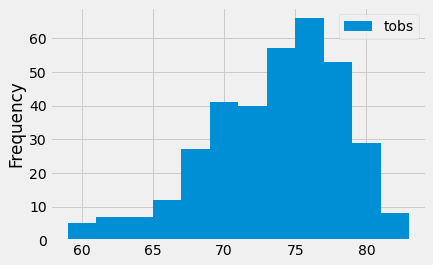

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
past_year = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_from_lastDate).all()
past_year 

past_year_DF = pd.DataFrame(past_year, columns=['tobs'])
past_year_DF

past_year_DF.plot.hist(bins=12)
plt.show()

# Close session

In [65]:
# Close Session
session.close()